In [45]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random

In [46]:
class AgentState (TypedDict):
    message : str
    name: str
    numbers: List[int]
    conuter: int

In [47]:
def greeting_function (state: AgentState) -> AgentState:
    """Esta funcion da un mensaje de bienvenida al nombre ingresado"""
    state['message'] = f"Hola! {state["name"]}, bienvenido al blucle."
    state["conuter"] = 0
    return state

def random_function (state:AgentState) -> AgentState:
    """Esta funcion devuelve una lista random de 0 a 10"""
    state["numbers"].append(random.randint(0, 10))
    state["conuter"]+=1
    return state

def loop_function (state:AgentState) -> AgentState:
    """Esta funcion decide hasta cuando entrar al loop, en base al counter ingresado"""
    print("en blucle")
    if state["conuter"] < 5:
        print(state["conuter"])
        return "loop_edge"
    else:
        print("fin del loop")
        return "exit_edge"





In [48]:
graph = StateGraph(AgentState)

#nodes
graph.add_node("greeting_node", greeting_function)
graph.add_node("random_node", random_function)

#edges
graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "random_node")
graph.add_conditional_edges(
    "random_node",
    loop_function,
    {
        "loop_edge" : "random_node",
        "exit_edge" : END
    }
)
# el loop no es un nodo es una rama mas, como un solo edge mas que vuelve a un nodo
app = graph.compile()

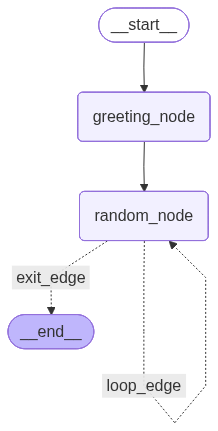

In [49]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [50]:
#outpus

input1 = AgentState(numbers=[], conuter= 5, name= "Julio", message = [])
resultado1 = app.invoke(input1)


en blucle
1
en blucle
2
en blucle
3
en blucle
4
en blucle
fin del loop


In [51]:
resultado1["numbers"]

[7, 10, 7, 6, 6]